# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus Project

**Disclaimer**
This notebook was generated by an artificial intelligence and has not been fully verified. Users should exercise caution when interpreting the code, visualizations, and results.

This project investigates the evolution of neural representations of visual stimuli from the LGN through V1 to the hippocampus, using multi-electrode extracellular electrophysiology and other techniques.

**Dandiset Overview**
- **Name**: Allen Institute Openscope - Vision2Hippocampus project
- **Description**: How neural representations evolve from the thalamus to the hippocampus.
- **Keywords**: mouse, neuropixel, extracellular electrophysiology, and more.
- View the Dandiset [here](https://dandiarchive.org/dandiset/000690).

**This Notebook Covers:**
1. Loading the Dandiset using DANDI API.
2. Exploring one NWB file from the dataset.
3. Visualizing the data present within the NWB file.
4. Drawing insights and considering future directions for analysis.

## Required Packages
- `dandi`
- `pynwb`
- `h5py`
- `matplotlib`
- `seaborn`
- `pandas`

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690")

# Retrieve and display basic Dandiset information
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['identifier']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: DANDI:000690
Found 156 assets in the dataset

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049.nwb


## Exploring an NWB File
We'll load and explore the NWB file: `sub-692072/sub-692072_ses-1298465622.nwb`.
This will showcase how to access its structural data.
You can view this NWB file on [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=draft).

In [2]:
# Load the NWB file using the URL
url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print the session description from the NWB metadata
print(nwb.session_description)
print(f"Session ID: {nwb.session_id}")
print(f"Session start time: {nwb.session_start_time}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Data and metadata for an Ecephys session
Session ID: 1298465622
Session start time: 2023-09-21 00:00:00-07:00


## Visualizing Data
Let's visualize some data, for example, eye tracking information.

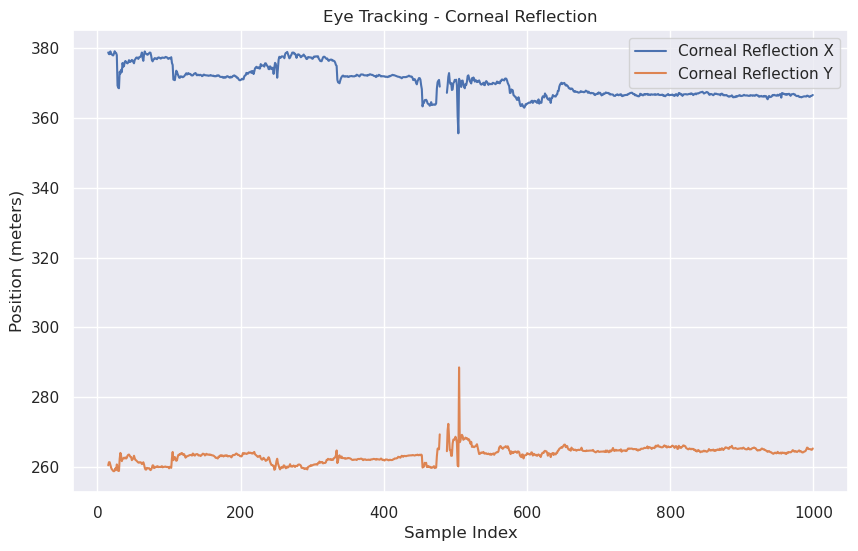

In [3]:
eye_tracking = nwb.acquisition["EyeTracking"].spatial_series["corneal_reflection_tracking"]
data_sample = eye_tracking.data[:1000]  # Load a small sample for visualization

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data_sample[:, 0], label='Corneal Reflection X')
plt.plot(data_sample[:, 1], label='Corneal Reflection Y')
plt.title('Eye Tracking - Corneal Reflection')
plt.xlabel('Sample Index')
plt.ylabel('Position (meters)')
plt.legend()
plt.show()

## Summary and Future Directions
In this notebook, we demonstrated how to load and visualize data from a Dandiset using the DANDI API and PyNWB. Future analyses can further explore behavioral correlations or spike sorting using high-performance computing tools beyond the scope of this notebook.